# Part 4: Managing Time Series Data With Pandas

## Time Series Advanced / Financial Data

### Importing and Exporting Stock Price Data from Yahoo Finance

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT" ]
ticker2 = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT",'TSLA','GOOG']

In [3]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2019-02-06")

[*********************100%***********************]  6 of 6 completed


In [5]:
stocks2 = yf.download(ticker2, start = "2019-01-01", end = "2021-04-06")

[*********************100%***********************]  8 of 8 completed


In [12]:
stocks2.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'DIS'),
            ('Adj Close', 'GOOG'),
            ('Adj Close',  'IBM'),
            ('Adj Close',   'KO'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close',   'BA'),
            (    'Close',  'DIS'),
            (    'Close', 'GOOG'),
            (    'Close',  'IBM'),
            (    'Close',   'KO'),
            (    'Close', 'MSFT'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High',   'BA'),
            (     'High',  'DIS'),
            (     'High', 'GOOG'),
            (     'High',  'IBM'),
            (     'High',   'KO'),
            (     'High', 'MSFT'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low',   'BA'),
            (      'Low',  'DIS'),
            (      'Low', 'GOOG'),
            (      '

In [ ]:
stocks.tail()

In [ ]:
stocks.info()

In [13]:
stocks.to_csv("stocks.csv")

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0])

In [ ]:
stocks.head()

In [ ]:
stocks.columns = stocks.columns.to_flat_index()

In [ ]:
stocks.columns

In [ ]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [ ]:
stocks.head()

In [ ]:
stocks.swaplevel(axis = 1).sort_index(axis = 1)

### Initial Inspection and Visualization

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
stocks.head()

In [ ]:
stocks.tail()

In [ ]:
stocks.info()

In [14]:
stocks.describe()

Adj Close                                                      \
              AAPL           BA          DIS          IBM           KO   
count  2289.000000  2289.000000  2289.000000  2289.000000  2289.000000   
mean     23.069882   130.148071    71.625703   126.885291    32.152466   
std      11.758983    88.687133    29.818073    16.959474     6.786859   
min       5.908031    42.180115    25.536150    85.500839    17.790277   
25%      13.521920    60.512379    38.741524   118.516098    27.532042   
50%      21.490923   111.240807    79.018356   129.013351    32.740440   
75%      29.002626   135.348984    99.532654   140.112030    37.310146   
max      56.387985   398.570557   116.560318   159.538162    46.845711   

                          Close                                         ...  \
              MSFT         AAPL           BA          DIS          IBM  ...   
count  2289.000000  2289.000000  2289.000000  2289.000000  2289.000000  ...   
mean     43.947906    25.003036   144.064513    76.563272   164.363194  ...   
std      25.090229    11.727062    88.321575    29.837647    24.157742  ...   
min      18.044788     6.858929    54.130001    29.000000   107.570000  ...   
25%      23.572279    15.420357    73.739998    43.470001   145.990005  ...   
50%      36.753197    23.747499   127.639999    85.860001   162.039993  ...   
75%      54.549843    31.695000   152.250000   104.220001   185.919998  ...   
max     111.988419    58.017502   410.179993   121.690002   215.800003  ...   

              Open                                               Volume  \
               DIS          IBM           KO         MSFT          AAPL   
count  2289.000000  2289.000000  2289.000000  2289.000000  2.289000e+03   
mean     76.558703   164.305963    39.367005    48.649244  3.187362e+08   
std      29.868884    24.143379     5.568519    24.463537  2.380407e+08   
min      28.730000   108.000000    25.110001    23.090000  4.590360e+07   
25%      43.470001   146.000000    36.174999    28.969999  1.371600e+08   
50%      86.000000   162.000000    40.689999    41.610001  2.498160e+08   
75%     104.230003   185.600006    43.320000    58.650002  4.298896e+08   
max     121.500000   215.380005    50.820000   115.419998  1.880998e+09   

                                                                             
                 BA           DIS           IBM            KO          MSFT  
count  2.289000e+03  2.289000e+03  2.289000e+03  2.289000e+03  2.289000e+03  
mean   4.600220e+06  8.780499e+06  4.804254e+06  1.503044e+07  4.154675e+07  
std    2.440858e+06  4.912058e+06  2.526676e+06  6.573916e+06  2.338828e+07  
min    7.889000e+05  2.165700e+06  1.193000e+06  2.996300e+06  7.425600e+06  
25%    3.108500e+06  6.056300e+06  3.310000e+06  1.082690e+07  2.590170e+07  
50%    4.091200e+06  7.603600e+06  4.168400e+06  1.354870e+07  3.599450e+07  
75%    5.331900e+06  9.949000e+06  5.398900e+06  1.754960e+07  5.159570e+07  
max    4.439180e+07  8.704850e+07  3.049020e+07  9.896750e+07  3.193179e+08  

[8 rows x 36 columns]

In [15]:
close = stocks.loc[:, "Close"].copy()

In [16]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,7.526071,54.130001,32.25,130.899994,28.500000,30.480000
2010-01-04,7.643214,56.180000,32.07,132.449997,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.99,130.850006,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.82,130.000000,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.83,129.550003,28.094999,30.450001


In [17]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

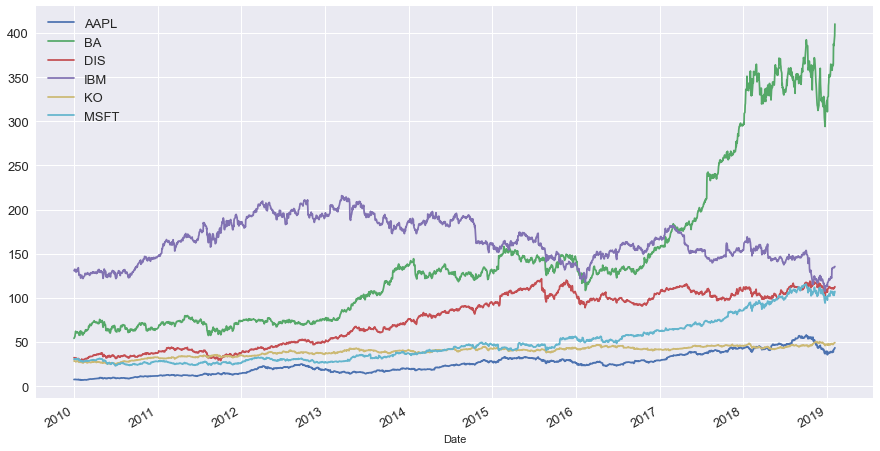

In [18]:
close.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### Normalizing Time Series to a Base Value (100)

In [19]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,7.526071,54.130001,32.25,130.899994,28.500000,30.480000
2010-01-04,7.643214,56.180000,32.07,132.449997,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.99,130.850006,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.82,130.000000,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.83,129.550003,28.094999,30.450001


In [20]:
close.iloc[0,0]

7.526071071624756

In [26]:
close.AAPL.div(close.iloc[0,0])#.mul(100)

Date
2009-12-31    1.000000
2010-01-04    1.015565
2010-01-05    1.017321
2010-01-06    1.001139
2010-01-07    0.999288
                ...   
2019-01-30    5.489252
2019-01-31    5.528781
2019-02-01    5.531439
2019-02-04    5.688559
2019-02-05    5.785887
Name: AAPL, Length: 2289, dtype: float64

In [27]:
close.iloc[0]

AAPL      7.526071
BA       54.130001
DIS      32.250000
IBM     130.899994
KO       28.500000
MSFT     30.480000
Name: 2009-12-31 00:00:00, dtype: float64

In [28]:
norm = close.div(close.iloc[0]).mul(100)
norm

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-04,101.556498,103.787178,99.441860,101.184112,100.070177,101.541999
2010-01-05,101.732082,107.186402,99.193798,99.961812,98.859646,101.574802
2010-01-06,100.113899,110.437830,98.666666,99.312457,98.824565,100.951447
2010-01-07,99.928817,114.908553,98.697674,98.968685,98.578945,99.901579
...,...,...,...,...,...,...
2019-01-30,548.925191,716.275621,341.488364,102.658526,167.929827,349.015744
2019-01-31,552.878125,712.396060,345.798439,102.689079,168.877197,342.618116
2019-02-01,553.143874,715.739858,345.116289,102.444624,170.877196,337.204725


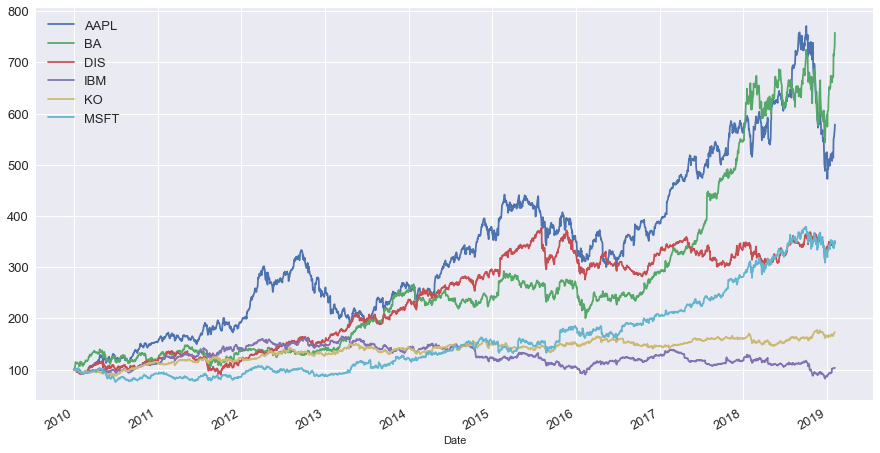

In [25]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### The shift() method

In [ ]:
close.head()

In [ ]:
aapl = close.AAPL.copy().to_frame()

In [ ]:
aapl.head()

In [ ]:
aapl.shift(periods = 1)

In [ ]:
aapl["lag1"] = aapl.shift(periods = 1)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.sub(aapl.lag1)

In [ ]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [ ]:
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [ ]:
aapl.head()

### The methods diff() and pct_change()

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.diff(periods = 2)

In [ ]:
aapl["Diff2"] = aapl.AAPL.diff(periods = 1)

In [ ]:
aapl.head(10)

In [ ]:
aapl.Diff.equals(aapl.Diff2)

In [ ]:
aapl["pct_change2"] = aapl.AAPL.pct_change(periods = 1).mul(100)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

### Measuring Stock Perfromance with MEAN Return and STD of Returns

In [ ]:
import numpy as np

In [ ]:
aapl = close.AAPL.copy().to_frame()

In [ ]:
aapl.head()

In [ ]:
aapl.pct_change().dropna()

In [ ]:
ret = aapl.pct_change().dropna()
ret.head()

In [ ]:
ret.info()

In [ ]:
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)
plt.show()

In [ ]:
daily_mean_Return = ret.mean()
daily_mean_Return

In [ ]:
var_daily_Returns = ret.var()
var_daily_Returns

In [ ]:
std_daily_Returns = np.sqrt(var_daily_Returns)
std_daily_Returns

In [ ]:
ret.std()

In [ ]:
ann_mean_Return = ret.mean() * 252
ann_mean_Return

In [ ]:
ann_var_Returns = ret.var() * 252
ann_var_Returns

In [ ]:
ann_std_Returns = np.sqrt(ann_var_Returns)
ann_std_Returns

In [ ]:
ret.std() * np.sqrt(252)

### Financial Time Series - Return and Risk

In [ ]:
import numpy as np

In [ ]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
close.head()

In [ ]:
close.pct_change().dropna()

In [ ]:
ret = close.pct_change().dropna()

In [ ]:
ret.head()

In [ ]:
ret.describe().T.loc[:, ["mean", "std"]]

In [ ]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

In [ ]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [ ]:
summary

In [ ]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Financial Time Series - Covariance and Correlation

In [ ]:
ret.head()

In [ ]:
ret.cov()

In [ ]:
ret.corr()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

### Helpful DatetimeIndex Attributes and Methods

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
stocks.head()

In [ ]:
close = stocks.loc[:, "Close"].copy()

In [ ]:
close.head()

In [ ]:
close.info()

In [ ]:
close.index

In [ ]:
close.index.day

In [ ]:
close.index.month

In [ ]:
close.index.year

In [ ]:
close.index.day_name()

In [ ]:
close.index.month_name()

In [ ]:
 close.index.weekday

In [ ]:
close.index.quarter

In [ ]:
close.index.days_in_month

In [ ]:
close.index.week

In [ ]:
close.index.weekofyear

In [ ]:
close.index.is_month_end

In [ ]:
close["Day"] = stocks.index.day_name()
close["Quarter"] = stocks.index.quarter

In [ ]:
close.head()

### Filling NA Values with bfill, ffill and interpolation

In [ ]:
close.head()

In [ ]:
close.tail()

In [ ]:
all_days = pd.date_range(start = "2009-12-31", end = "2019-02-06", freq = "D")
all_days

In [ ]:
close = close.reindex(all_days)

In [ ]:
close.head(20)

In [ ]:
close.Day = close.index.day_name()
close.Quarter = close.index.quarter

In [ ]:
close.fillna(method = "ffill", inplace= True)

In [ ]:
close.head(15)

In [ ]:
temp = pd.read_csv("temp.csv", parse_dates=["datetime"], index_col = "datetime")

In [ ]:
temp.head(10)

In [ ]:
temp = temp.resample("30 Min").mean()
temp.head(10)

In [ ]:
temp.interpolate()